# OLA

In [273]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [274]:
df = pd.read_csv('E:/DSML_Projects/Ensemble_methods/ola_driver_scaler.csv')

In [275]:
df.head()


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


* We have one non useful column, need to remove this
* The drivers IDs are repeated I will group them

In [276]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [277]:
df.shape

(19104, 13)

* The dataset contains 19104 rows and 13 columns


* MMMM-YY : Reporting Date (Monthly)
* Driver_ID : Unique id for drivers
* Age : Age of the driver
* Gender : Gender of the driver – Male : 0, Female: 1
* City : City Code of the driver
* Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
* Income : Monthly average Income of the driver
* Date Of Joining : Joining date for the driver
* LastWorkingDate : Last date of working for the driver
* Joining Designation : Designation of the driver at the time of joining
* Grade : Grade of the driver at the time of reporting
* Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
* Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [279]:
df.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [280]:
df.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [281]:
#Converting date of joining and last working date to datetime columns
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])


In [282]:
#Grouping driver ids and reporting date
# Before grouping I will sort the data
df.sort_values(by=['Driver_ID', 'MMM-YY'], inplace = True)


In [283]:
#Grouping driver ids 
df1 = df.groupby(by='Driver_ID').agg({'Age':'last', 'Gender':'last', 'City':'last', 
                                'Education_Level':'last', 'Income':'last',
                                'Dateofjoining':'min', 'LastWorkingDate':'last', 
                                'Joining Designation':'min', 'Grade':'last',
                                'Total Business Value':'sum', 
                                'Quarterly Rating':'last'}).reset_index(drop=True)

In [284]:
#As there is no need of reporting time I will remove this column
df.drop(['MMM-YY'], axis = 1, inplace = True)

In [285]:
df1.columns

Index(['Age', 'Gender', 'City', 'Education_Level', 'Income', 'Dateofjoining',
       'LastWorkingDate', 'Joining Designation', 'Grade',
       'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [287]:
#For calculating target need to place 0 if last working date is not null and 1 if last working date is mentioned
def target(row):
    if pd.isna(row):
        return 0
    return 1
df1['target'] = df1['LastWorkingDate'].apply(target)

In [288]:
df1['target'].value_counts()


1    1616
0     765
Name: target, dtype: int64

In [289]:
# Creating a new column which tells if the monthly income has increased␣ for a particular driver
joining_inc = df.groupby('Driver_ID').agg({'Income':'first'}).values.reshape(-1,)
latest_inc = df.groupby('Driver_ID').agg({'Income':'last'}).values.reshape(-1,)
income_increase = latest_inc - joining_inc
df1['income increase'] = income_increase
df1['income increase'] = df1['income increase'].apply(lambda row: 1 if row > 0 else 0)


In [290]:
df1['income increase'].value_counts()

0    2340
1      41
Name: income increase, dtype: int64

In [291]:
# Creating a new column which tells whether the quaterly rating has increased for a particular driver
joining_quart_rating = df.groupby('Driver_ID').agg({'Quarterly Rating':'first'}).values.reshape(-1,)
latest_quart_rating = df.groupby('Driver_ID').agg({'Quarterly Rating':'last'}).values.reshape(-1,)
quart_rating_increase = latest_quart_rating - joining_quart_rating
df1['quarterly rating increase'] = quart_rating_increase
df1['quarterly rating increase'] = df1['quarterly rating increase'].apply(lambda row: 1 if row > 0 else 0)

In [292]:
df1['quarterly rating increase'].value_counts()

0    2016
1     365
Name: quarterly rating increase, dtype: int64

In [293]:
# Dropping driver_id
df1.columns

Index(['Age', 'Gender', 'City', 'Education_Level', 'Income', 'Dateofjoining',
       'LastWorkingDate', 'Joining Designation', 'Grade',
       'Total Business Value', 'Quarterly Rating', 'target', 'income increase',
       'quarterly rating increase'],
      dtype='object')

In [294]:
#Dropping off DateOfjoining and Lastworking date columns 
df1.drop(['Dateofjoining', 'LastWorkingDate'], axis = 1, inplace = True)

In [295]:
# Seperating categorical and continuos features from the data set
cat_fea = ['Age', 'Gender', 'City', 'Education_Level', 'Joining Designation',
           'Grade', 'Quarterly Rating', 'target', 'income increase','quarterly rating increase']
cont_fea = ['Income', 'Total Business Value']

In [296]:
#Splitting the data before EDA and model building in order to avoid data leakage problem
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df1, train_size=0.8, random_state=42)

# VISUAL ANALYSIS

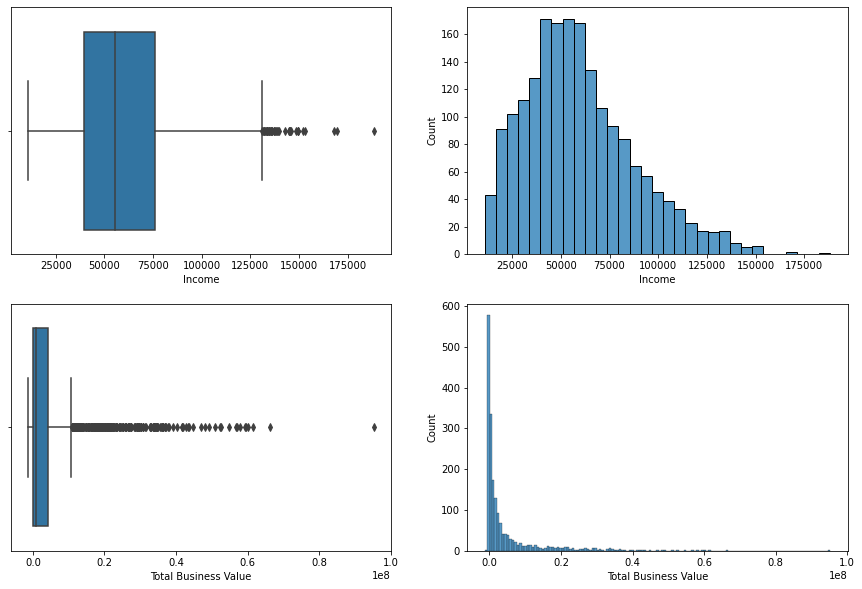

In [297]:
plt.figure(figsize=(15,10))
i = 1
for features in cont_fea:
    plt.subplot(2,2,i)
    sns.boxplot(train_df[features])
    plt.subplot(2,2,i+1)
    sns.histplot(train_df[features])
    i+=2


* By seeing the graphs for continuous features I can say that there are some outliers to be removed

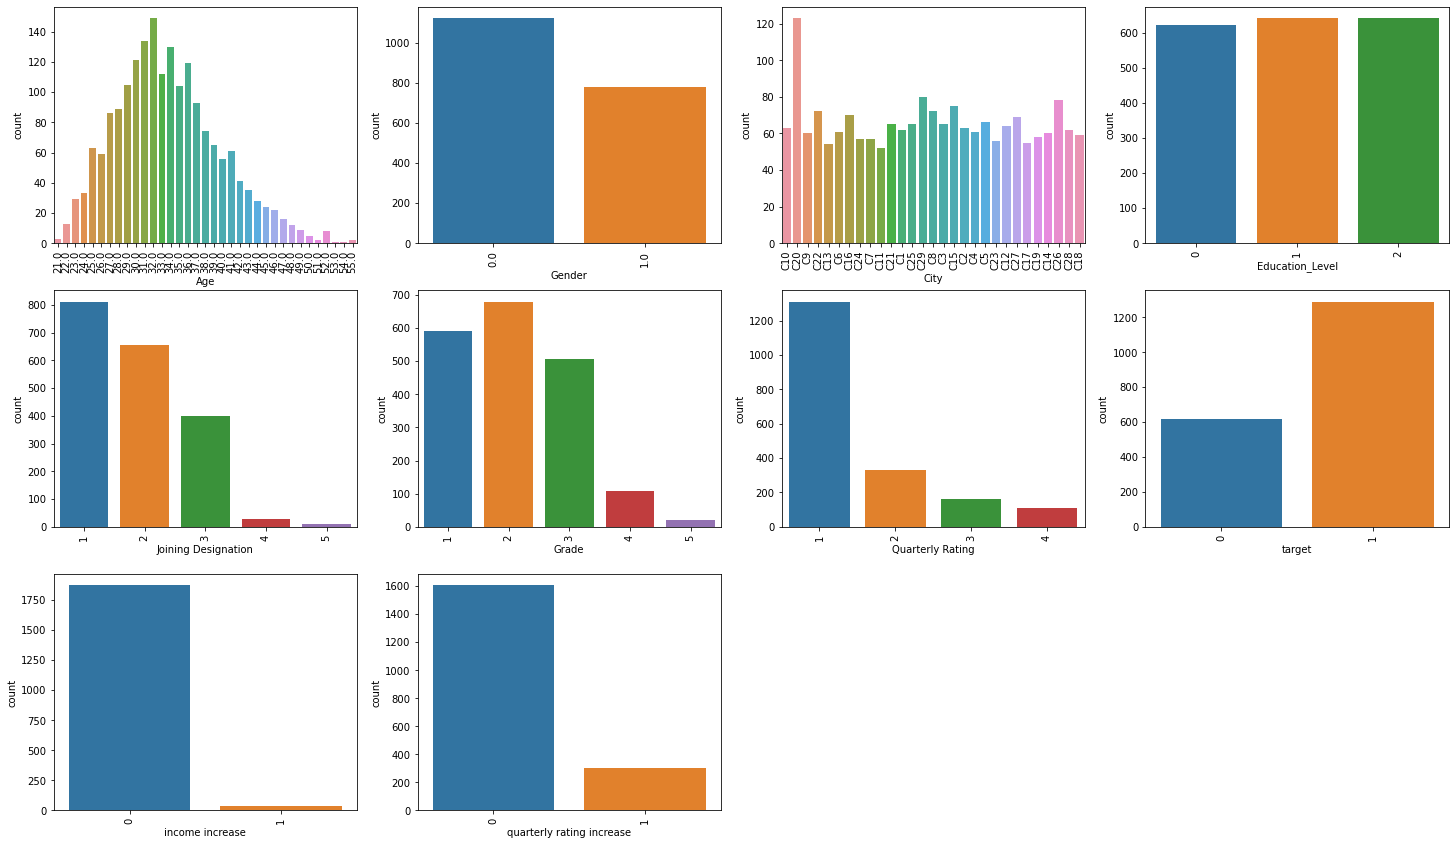

In [298]:
plt.figure(figsize=(25,20))
i = 1
for features in cat_fea:
    plt.subplot(4,4,i)
    sns.countplot(train_df[features])
    plt.xticks(rotation='90')
    i+=1
plt.show()

* There are more males than females
* There are more employees from City C20
* There are almost equal employees from all education levels
* There are more people from Joining Designation with 1
* There are more drivers with grade 2 attime of reporting
* There are more drivers whose quaterly rating with 1
* Quaterly income and Monthly income increase are very less

# MULTIVARIATE ANALYSIS

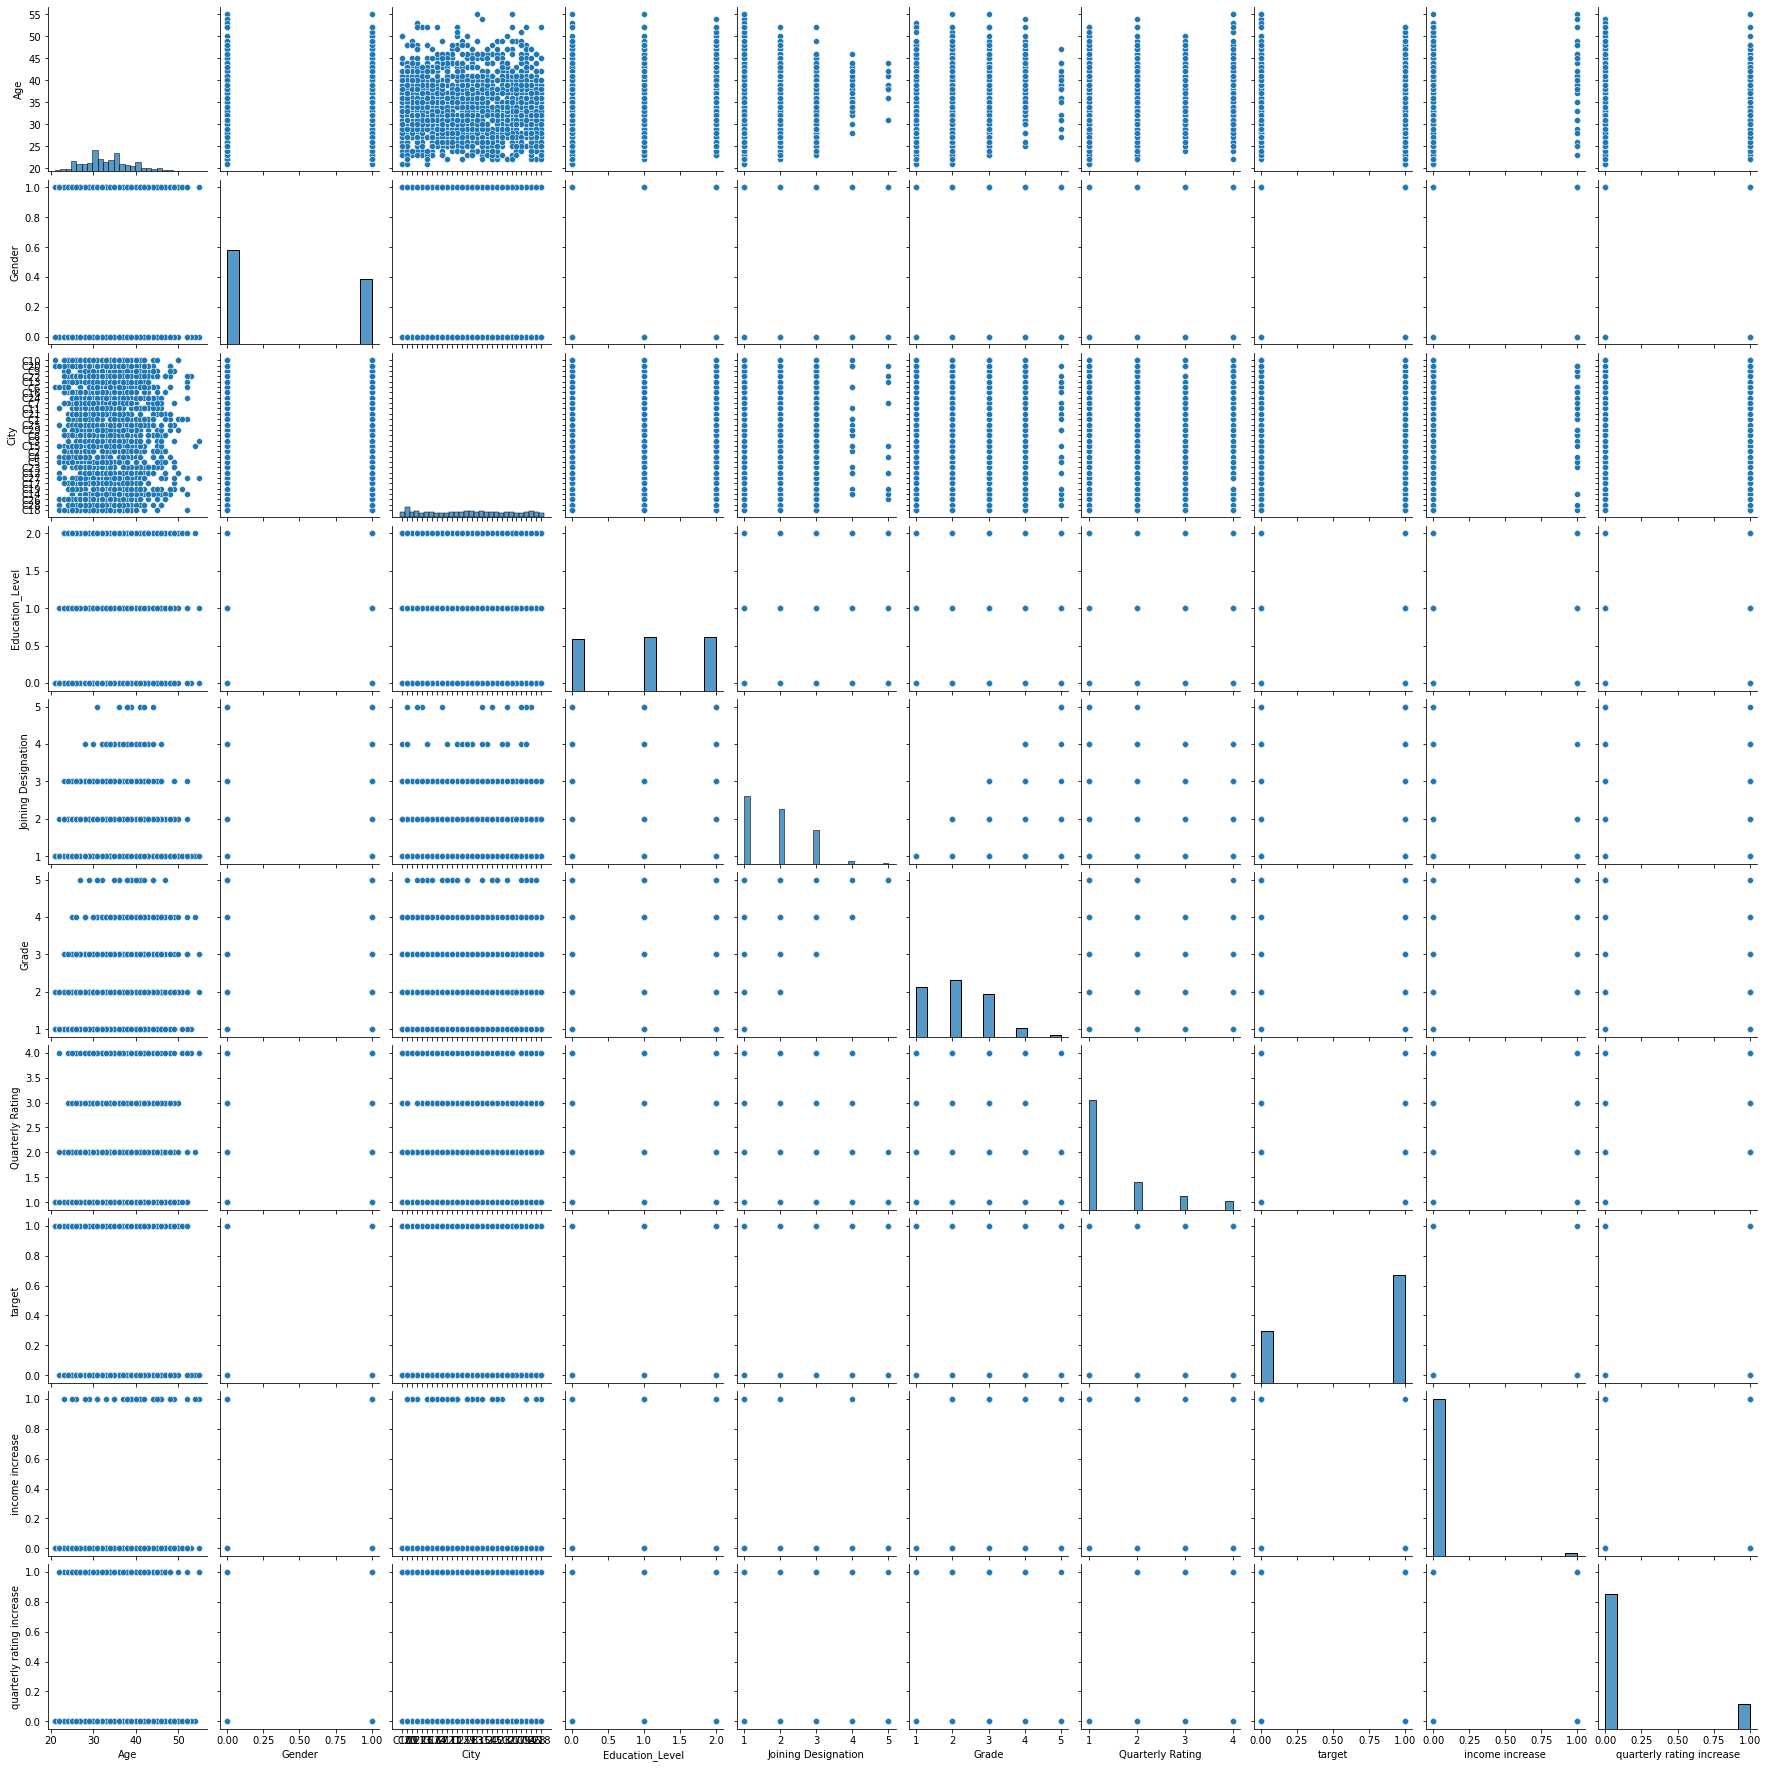

In [299]:
sns.pairplot(train_df,vars=['Age', 'Gender', 'City', 'Education_Level', 'Joining Designation',
                       'Grade', 'Quarterly Rating', 'target', 'income increase','quarterly rating increase'])

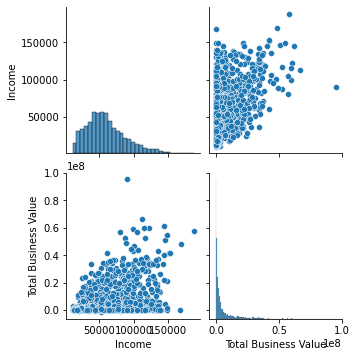

In [300]:
sns.pairplot(train_df,vars=['Income', 'Total Business Value'])

* By seeig the graphs I cam say that there is no any correlation between features

# Encoding

In [301]:
train_df['City'].value_counts()

C20    123
C29     80
C26     78
C15     75
C8      72
C22     72
C16     70
C27     69
C5      66
C3      65
C25     65
C21     65
C12     64
C2      63
C10     63
C1      62
C28     62
C6      61
C4      61
C14     60
C9      60
C18     59
C19     58
C24     57
C7      57
C23     56
C17     55
C13     54
C11     52
Name: City, dtype: int64

* As there are many cities I will go for Target Encoding as One Hot Encoding and Label Encoding will increase more dimensions

In [302]:
train_df['City'].shape

(1904,)

In [303]:
train_df['target'].shape

(1904,)

In [304]:
from category_encoders import TargetEncoder
encoder = TargetEncoder()
train_df['City'] = encoder.fit_transform(train_df['City'],train_df['target']).values.reshape(-1,)
test_df['City'] = encoder.transform(test_df['City'],test_df['target']).values.reshape(-1,)

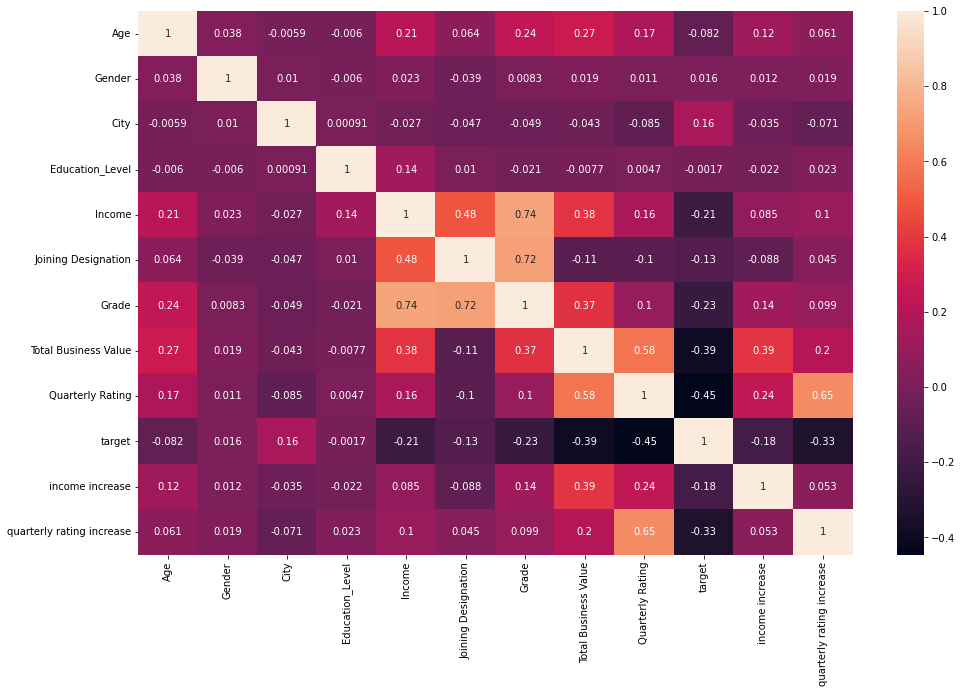

In [100]:
plt.figure(figsize=(16,10))
sns.heatmap(train_df.corr(method = 'pearson'), annot=True)
plt.show()

* Grade is highly correlated with Income and Joining designation but target is highly correlated with Grade than income. If we want we can remove income but as dataset is less am not removing any columns

# MISSING VALUE TREATMENT

In [308]:
df1.isna().sum()

Age                          0
Gender                       0
City                         0
Education_Level              0
Income                       0
Joining Designation          0
Grade                        0
Total Business Value         0
Quarterly Rating             0
target                       0
income increase              0
quarterly rating increase    0
dtype: int64

* As there are no misssing values no need to do any missing value treatment

# OUTLIER TREATMENT 

In [309]:
train_df.shape

(1904, 12)

In [310]:
def IQR(col):
    Q3 = np.percentile(col, 75)
    Q1 = np.percentile(col, 25)
    iqr = Q3-Q1
    upper_lmt = Q3+1.5*iqr
    lower_lmt = Q1-1.5*iqr
    return lower_lmt, upper_lmt

In [311]:
for fea in cont_fea:
    train_df =train_df[(train_df[fea]>=IQR(train_df[fea])[0])&(train_df[fea]<=IQR(train_df[fea])[1])]

In [312]:
train_df.shape

(1611, 12)

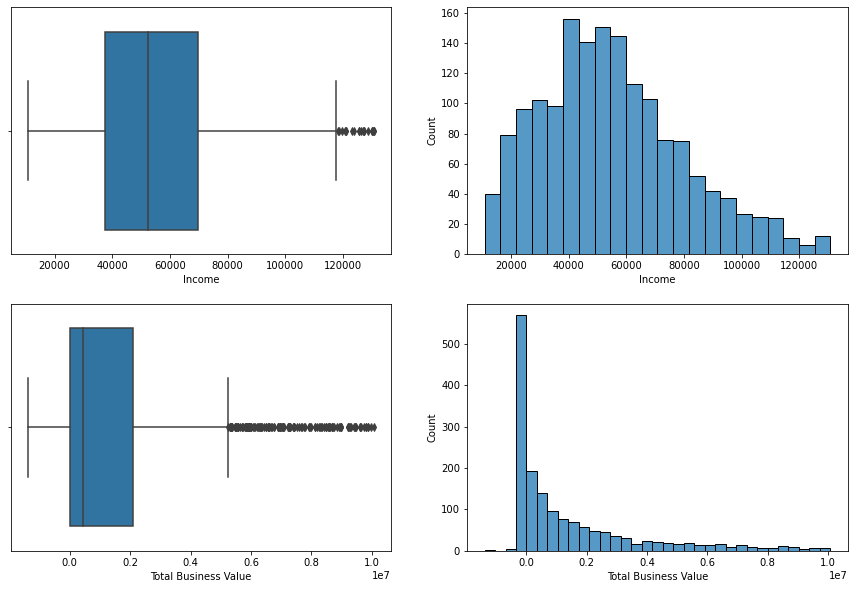

In [358]:
plt.figure(figsize=(15,10))
i = 1
for features in cont_fea:
    plt.subplot(2,2,i)
    sns.boxplot(train_df[features])
    plt.subplot(2,2,i+1)
    sns.histplot(train_df[features])
    i+=2

In [313]:
#checking for duplicates
df1.duplicated().value_counts()

False    2381
dtype: int64

In [315]:
x_train=train_df.drop('target', axis=1)
y_train=train_df['target']
x_test=test_df.drop('target', axis=1)
y_test=test_df['target']


In [316]:
# I am choosing Normal scaling rather than Min-max scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)

# BAGGING-RANDOMFOREST

In [323]:
y_train.value_counts()

1    1218
0     393
Name: target, dtype: int64

In [331]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
RF_params = {'max_depth':np.arange(1, 15, 1), 'n_estimators':np.arange(25,125,25)}

rf_model = GridSearchCV(RandomForestClassifier(class_weight={0:(1218/393), 1:1}), RF_params, scoring='recall', n_jobs=-1, cv=10)
rf_model.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(class_weight={0: 3.099236641221374,
                                                            1: 1}),
             n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'n_estimators': array([ 25,  50,  75, 100])},
             scoring='recall')

In [332]:
pred=rf_model.predict(x_test)

In [333]:
from sklearn.metrics import recall_score
RF_recall_score = recall_score(y_test, pred)

* Here am choosing Recall as my scoring parameter because for this problem I need to concentrate more on False negatives
* If any employee is not leaving company but I predicted as leaving then it will be loss for giving bonus and other incentives. So i will concentrate more on False Negatives

In [334]:
RF_recall_score

0.9296636085626911

In [336]:
pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [337]:
from sklearn.metrics import recall_score
#Choosing best estimator and checking Recall score
recall_score(y_test, rf_model.best_estimator_.predict(x_test))

0.9296636085626911

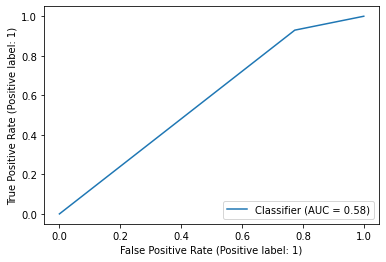

In [359]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, pred)

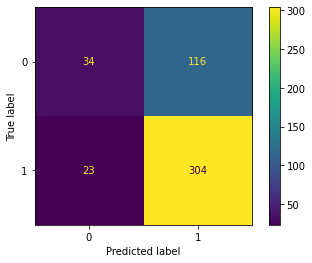

In [339]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, pred)

* I got Recall score 0.92 with 23 FN values
* 0.92 is good so am considering this model

In [366]:
RF_model=rf_model.best_estimator_

In [369]:
fea_imp_rf = pd.DataFrame(data={'features':x_train.columns, 
                             'importance':RF_model.feature_importances_}).sort_values(by='importance')

In [370]:
fea_imp_rf

,features,importance
9,income increase,0.000000
1,Gender,0.025406
6,Grade,0.043258
3,Education_Level,0.043265
10,quarterly rating increase,0.051155
5,Joining Designation,0.070877
8,Quarterly Rating,0.082385
0,Age,0.157480
2,City,0.158167
7,Total Business Value,0.160625


# BOOSTING

In [352]:
from lightgbm import LGBMClassifier
GB_params = {'max_depth':np.arange(1, 12, 1),
'n_estimators':np.arange(30,150,30),
'learning_rate':np.arange(0, 1, 0.1)}
GB = GridSearchCV(LGBMClassifier(class_weight= {1:1, 0:1218/393}), GB_params,cv=10, scoring='recall')


In [353]:
GB.fit(x_train, y_train)


GridSearchCV(cv=10,
             estimator=LGBMClassifier(class_weight={0: 3.099236641221374,
                                                    1: 1}),
             param_grid={'learning_rate': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'n_estimators': array([ 30,  60,  90, 120])},
             scoring='recall')

In [354]:
GB_y_pred = GB.predict(x_test)
GB_recall_score = recall_score(y_test, GB_y_pred)

In [355]:
GB_recall_score


0.8501529051987767

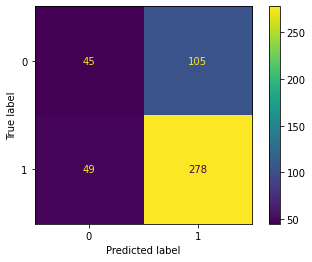

In [356]:
ConfusionMatrixDisplay.from_predictions(y_test, GB_y_pred)

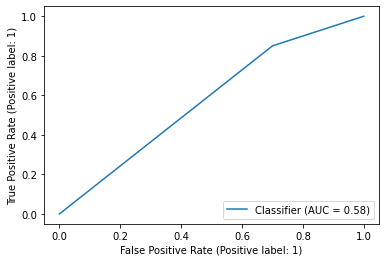

In [357]:
RocCurveDisplay.from_predictions(y_test, GB_y_pred)

* I got 0.85 recall score with 49 FN values so am considering this model as good
* ROC curve also looks fine

In [360]:
GB_model = GB.best_estimator_
GB_model

LGBMClassifier(class_weight={0: 3.099236641221374, 1: 1}, learning_rate=0.9,
               max_depth=9, n_estimators=120)

In [364]:
fea_imp = pd.DataFrame(data={'features':x_train.columns, 
                             'importance':GB_model.feature_importances_}).sort_values(by='importance')

In [365]:
fea_imp

,features,importance
9,income increase,0
10,quarterly rating increase,28
6,Grade,43
8,Quarterly Rating,68
5,Joining Designation,89
1,Gender,104
3,Education_Level,147
0,Age,530
7,Total Business Value,582
2,City,658


* By seeing both these models I can say that Age, Total business value, City and Income are playing vital role for this business problem